In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading csv files
pitdata = pd.read_csv('/content/drive/MyDrive/CSC302 Group Project/Data Set/pit_stops.csv')
crdata = pd.read_csv('/content/drive/MyDrive/CSC302 Group Project/Data Set/constructor_results.csv')
cdata = pd.read_csv('/content/drive/MyDrive/CSC302 Group Project/Data Set/constructors.csv')
  
# using merge function by setting how='outer'
vdf = pd.merge(pd.merge(pitdata, crdata, on='raceId', how='outer'),cdata,on='constructorId',how='outer')
vdf.head()



In [20]:
#limit the data to what is needed for the visual to improve performance
vdf = vdf[['duration','name']]
#vdf.head()

#limit the scope of the data to make visual easier to view
vdf['duration'] = pd.to_numeric(vdf['duration'], errors='coerce')
vdf = vdf.loc[vdf['duration'] < 30]


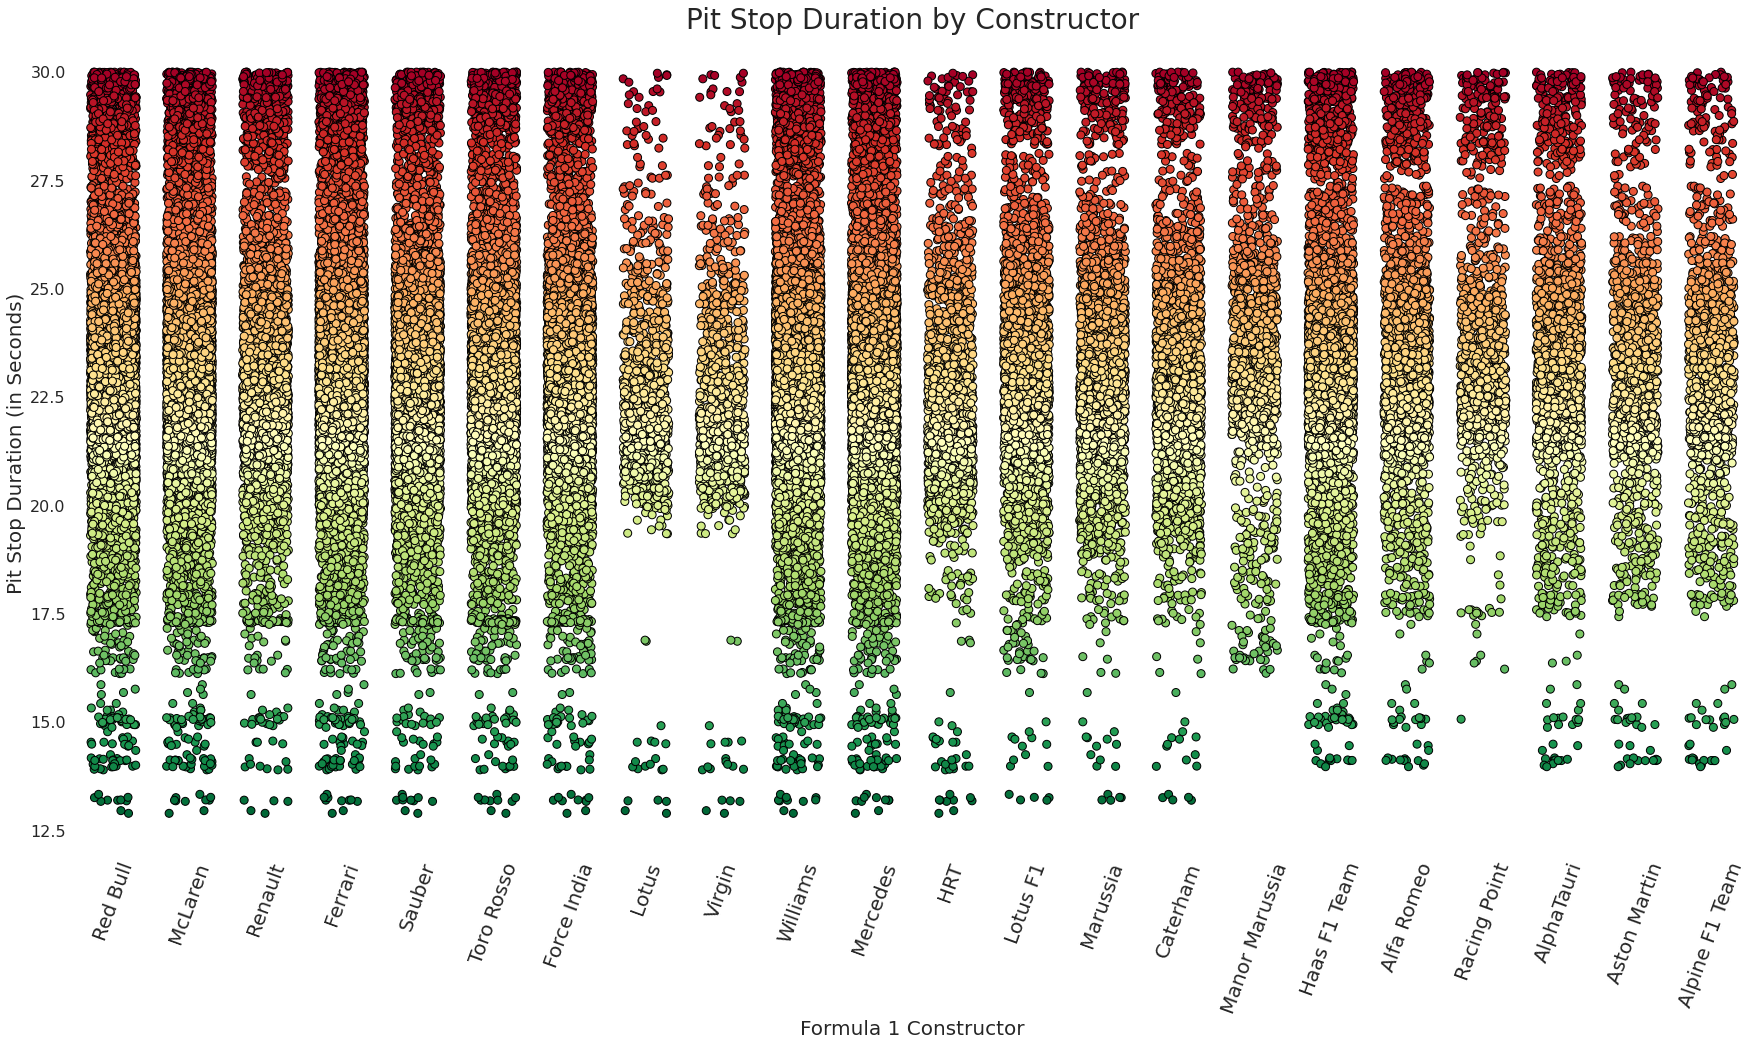

In [65]:


fig, ax = plt.subplots(figsize=(30, 15))
ax.set(xlabel='Formula 1 Constructor', 
       ylabel='Pit Stop Duration (in Seconds)', 
       title='Pit Stop Duration by Constructor')
ax.title.set_size(28)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=20, rotation=70)
sns.stripplot(data=vdf, x='name', y='duration', hue='duration', 
              jitter=.3, s=8, 
              palette=sns.color_palette("RdYlGn_r", as_cmap=True), 
              linewidth=1, edgecolor='black', legend=False)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

